In [1]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('final_training_data.csv').iloc[:, 1:]

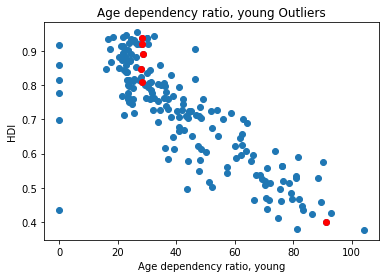

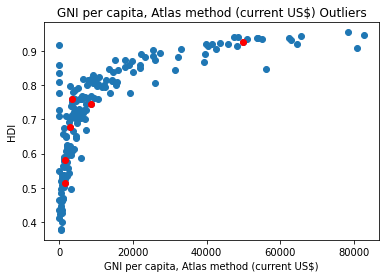

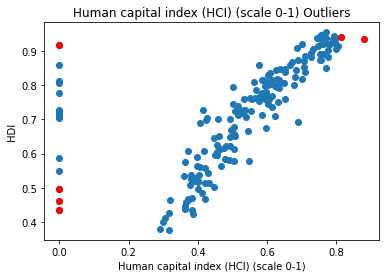

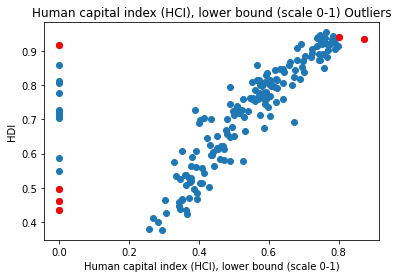

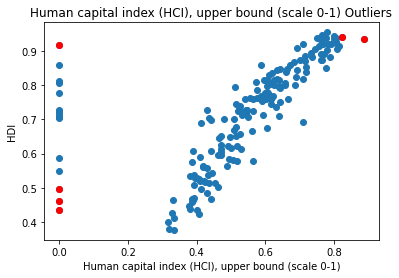

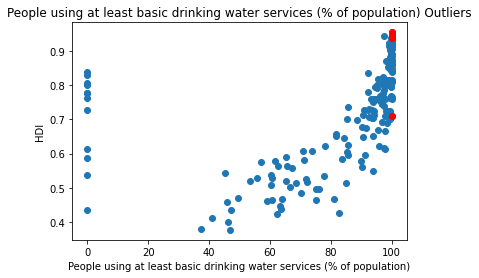

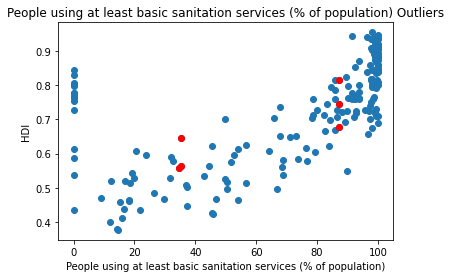

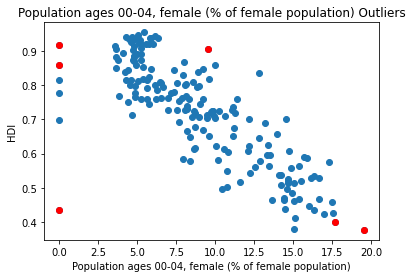

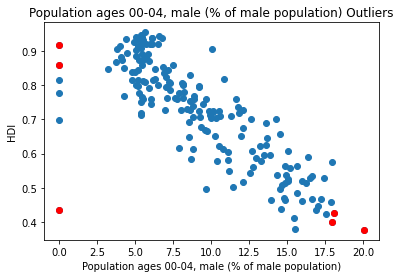

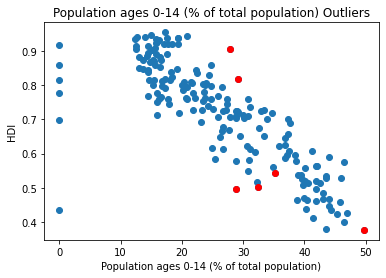

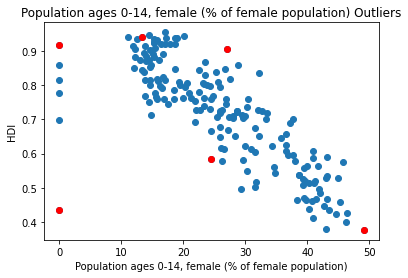

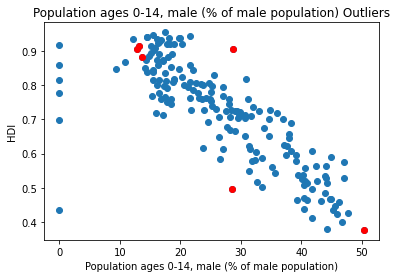

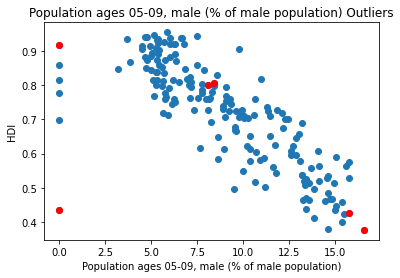

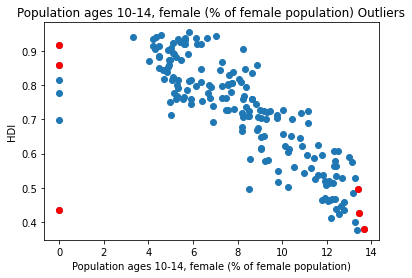

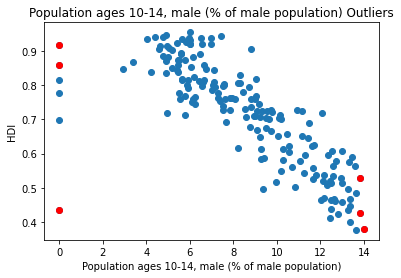

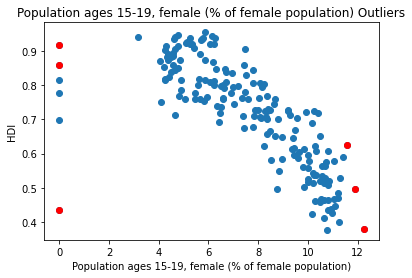

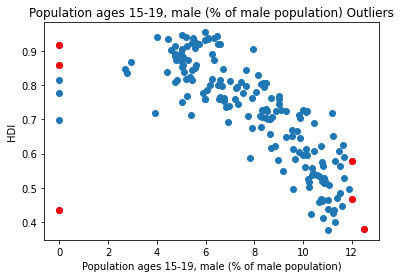

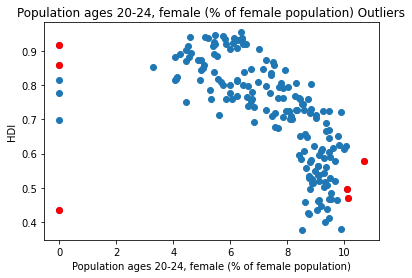

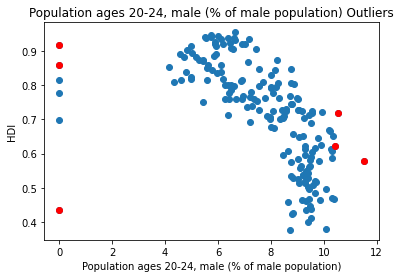

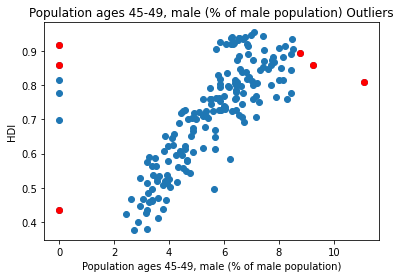

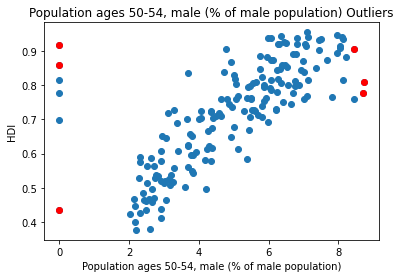

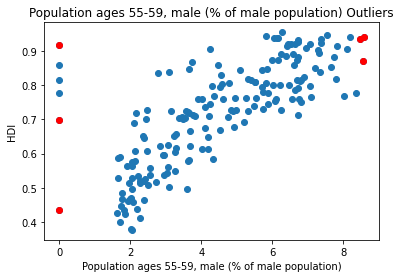

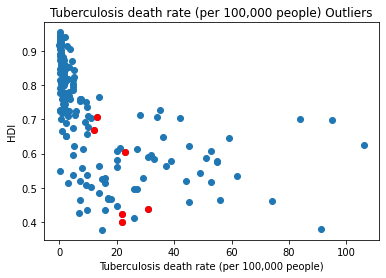

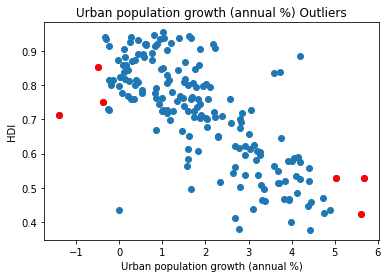

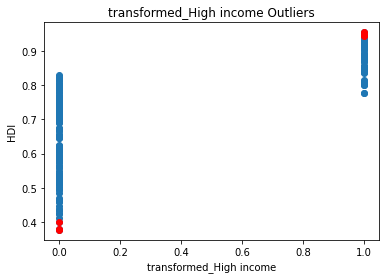

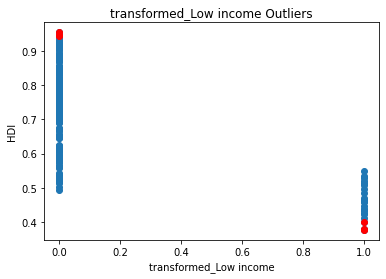

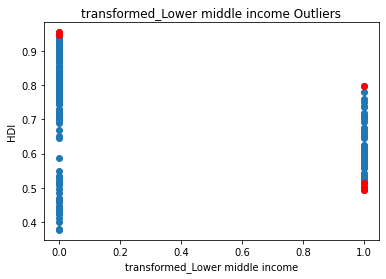

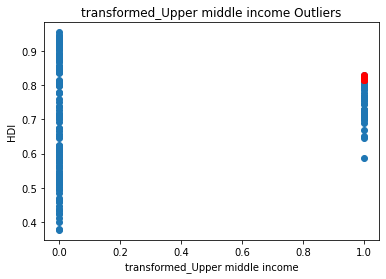

In [4]:
for i in range(len(data.columns)-1):
    
#     print(data.columns[i] + " Outliers")
    
    svm = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.03)

    pred = svm.fit_predict(pd.concat([data.iloc[:,i], data.iloc[:, -1]], axis=1))
    scores = svm.score_samples(pd.concat([data.iloc[:,i], data.iloc[:, -1]], axis=1))

    thresh = quantile(scores, 0.03)
    index = where(scores<=thresh)
    values = data.iloc[index[0].tolist(), :]

    plt.scatter(data.iloc[:,i], data.iloc[:,-1])
    plt.scatter(values.iloc[:,i], values.iloc[:,-1], color='r')
    t = str(data.columns[i] + " Outliers")
#     print(t)
    plt.title(t)
    plt.xlabel(data.columns[i])
    plt.ylabel("HDI")
    plt.show()